In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)
%matplotlib inline

In [26]:
data = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")

In [27]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [28]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2466643,203,CASH_OUT,208678.25,C1298083191,11249.0,0.00,C1172011932,937885.29,1146563.54,0.0,0.0
2466644,203,PAYMENT,15487.27,C1826134583,5367.0,0.00,M1791776543,0.00,0.00,0.0,0.0
2466645,203,CASH_OUT,29256.20,C675335512,0.0,0.00,C549787465,1222754.52,1252010.72,0.0,0.0
2466646,203,PAYMENT,9576.29,C473987506,277151.0,267574.71,M887177519,0.00,0.00,0.0,0.0
2466647,203,CASH_IN,298836.47,C1008573443,26734.0,325570.47,C1356040707,0.00,0.00,NaN,NaN


In [29]:
data.shape

(2466648, 11)

In [30]:
# Drop unwantedacolumns from data
data.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1,inplace=True)

In [31]:
# get all information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466648 entries, 0 to 2466647
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         float64
dtypes: float64(6), int64(1), object(1)
memory usage: 150.6+ MB


In [32]:
data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [33]:

# check all the null values in data
data.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
dtype: int64

In [34]:
# we have huge data so just drop null value
data.dropna(inplace=True)

In [35]:
# now check with duplicet values in data
data.duplicated().sum()

253

In [36]:
# we have 23 values that replteda it means thsi is duplicetade valued so we drop that
data.drop_duplicates(inplace=True)

In [37]:
# now rename the catigories in tragated features
def rename(x):
  if x == 0:
    return "Not Fraud"
  else:
    return "Fraud"
data["isFraud"] = data["isFraud"].apply(rename)

In [38]:
#saprate catigorical and numericl features
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude ="object").columns

In [39]:
print(catigorical_features)
print(numerical_features)

Index(['type', 'isFraud'], dtype='object')
Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')


In [40]:
# fatch all the unique of catigorical values
for i in catigorical_features:
  print(i,data[i].unique())
  print("="*50)

type ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
isFraud ['Not Fraud' 'Fraud']


In [41]:
# fatch all values counts in catigorical features
for i in catigorical_features:
  print(i,data[i].value_counts())
  print("="*50)

type CASH_OUT    877789
PAYMENT     824880
CASH_IN     543182
TRANSFER    204515
DEBIT        16028
Name: type, dtype: int64
isFraud Not Fraud    2464122
Fraud           2272
Name: isFraud, dtype: int64


<Axes: ylabel='isFraud'>

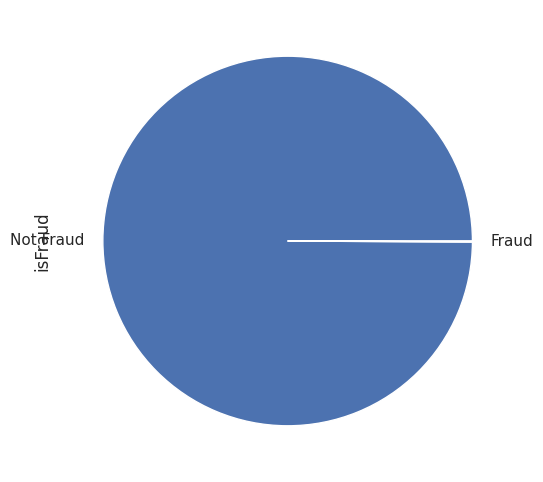

In [42]:
# this data is imbalance data
data["isFraud"].value_counts().plot.pie()

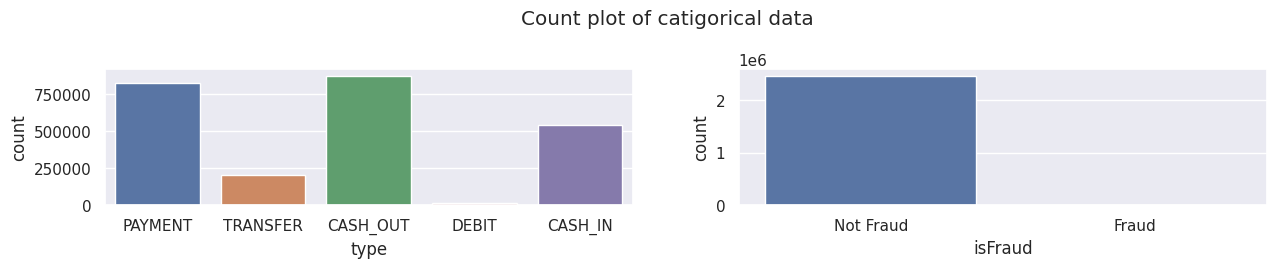

In [43]:
try:
  plt.suptitle("Count plot of catigorical data")
  for i in range(len(catigorical_features)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=data[catigorical_features[i]])
    plt.tight_layout
except Exception as e:
  print(e)


<Axes: xlabel='type'>

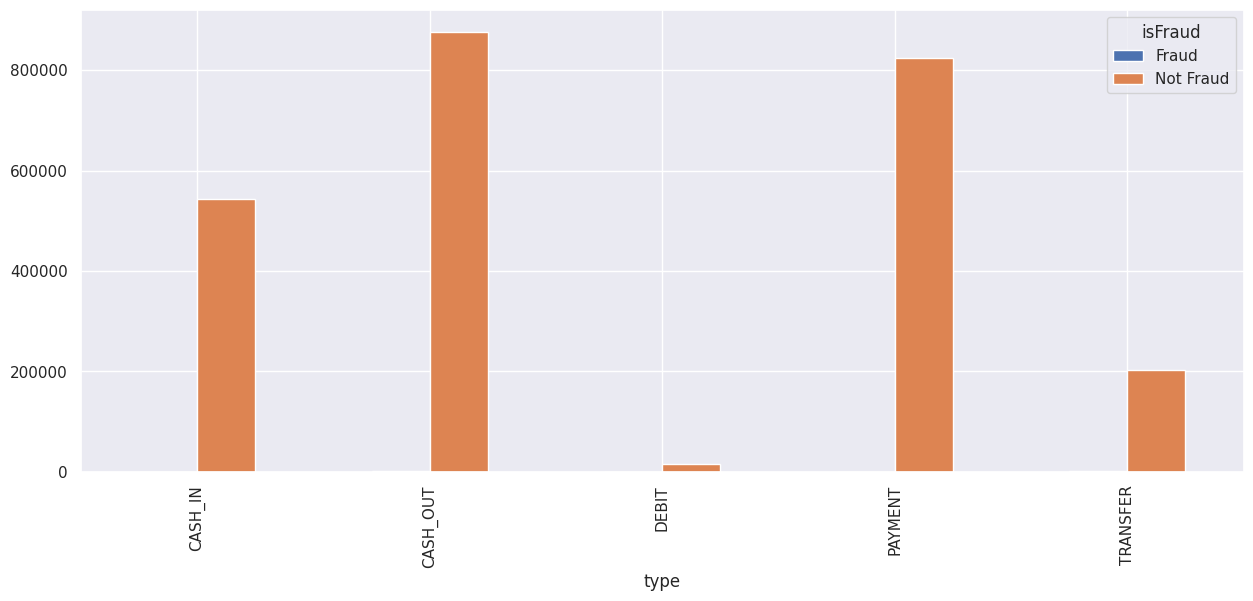

In [44]:
type = pd.crosstab(data["type"],data["isFraud"])
type.plot(kind="bar")

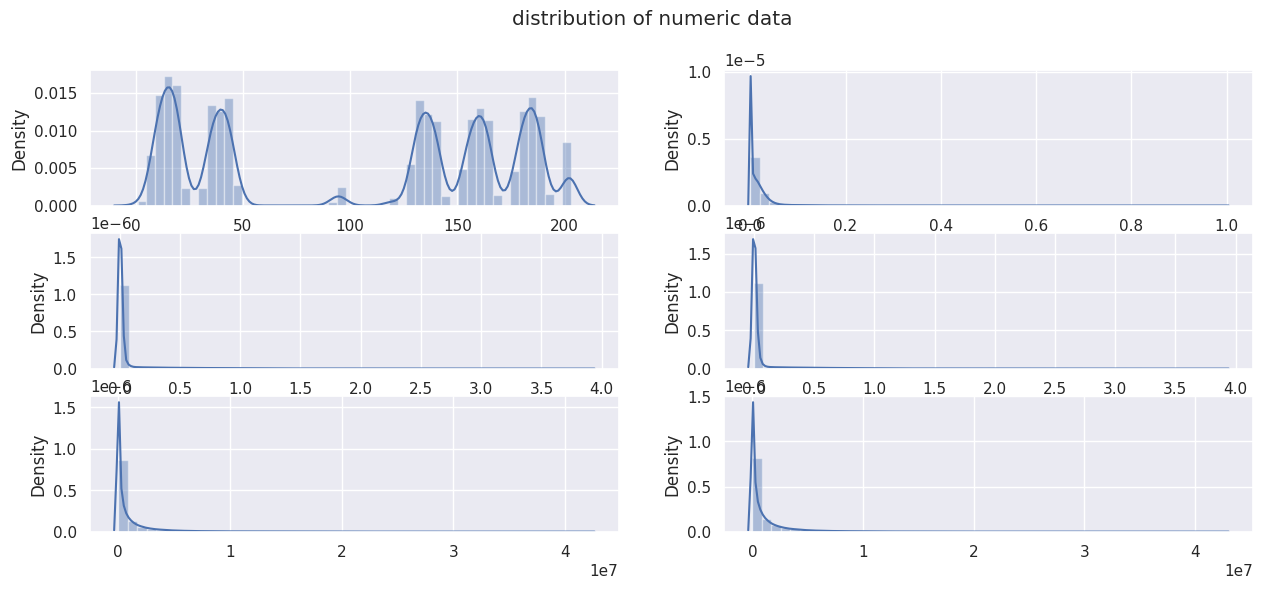

In [45]:
try:
  plt.suptitle("distribution of numeric data")
  for i in range(len(numerical_features)):
    plt.subplot(3,2,i+1)
    sns.distplot(x=data[numerical_features[i]])
    plt.tight_layout
except Exception as e:
  print(e)


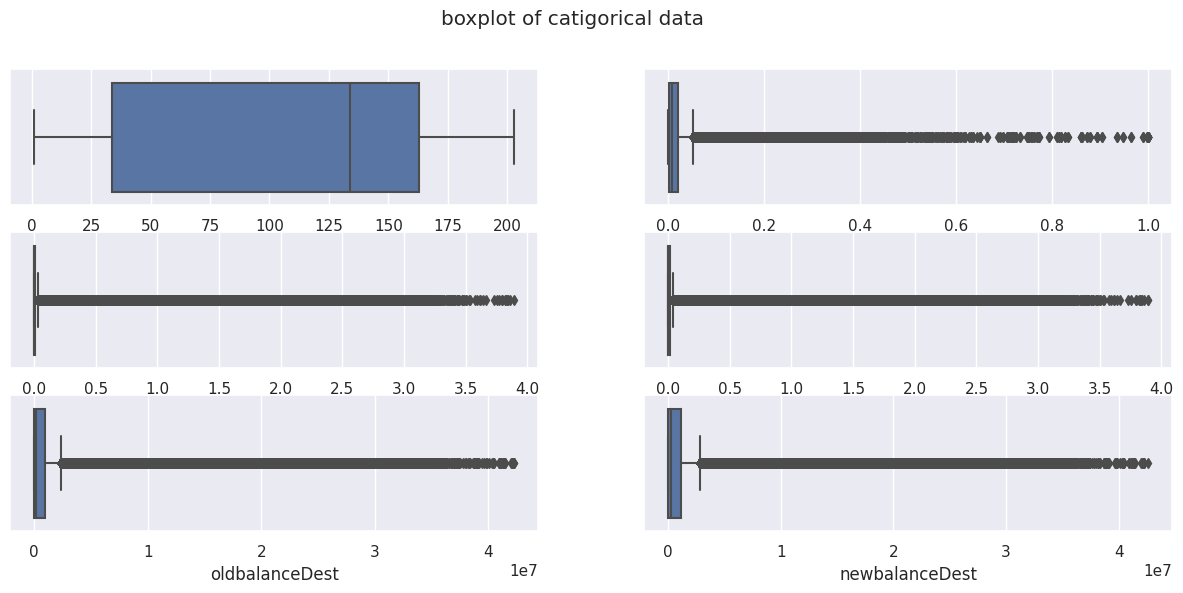

In [46]:
try:
  plt.suptitle("boxplot of catigorical data")
  for i in range(len(numerical_features)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.tight_layout
except Exception as e:
  print(e)


In [47]:
from sklearn.preprocessing import LabelEncoder ## using lable encoding on catigorical data
lable = LabelEncoder()

for i in catigorical_features:
  lable.fit(data[i])
  data[i] = lable.fit_transform(data[i])

<Axes: >

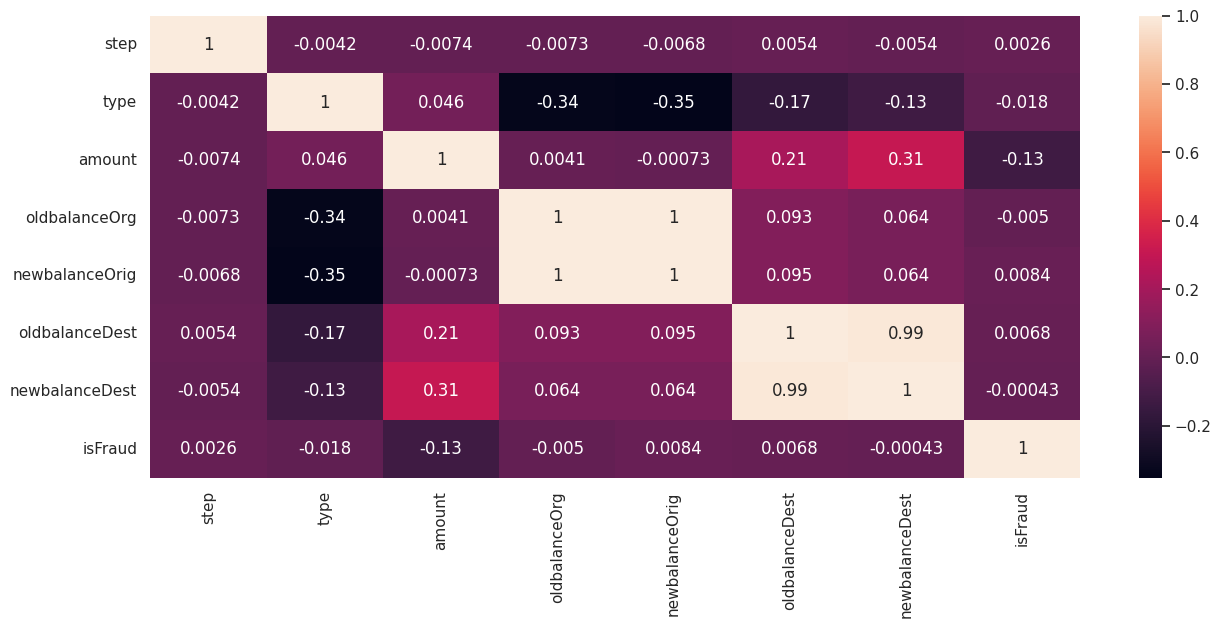

In [48]:
sns.heatmap(data.corr(),annot=True)

In [49]:
# Traning model
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.00,0.00,1
1,1,3,1864.28,21249.0,19384.72,0.00,0.00,1
2,1,4,181.00,181.0,0.00,0.00,0.00,0
3,1,1,181.00,181.0,0.00,21182.00,0.00,0
4,1,3,11668.14,41554.0,29885.86,0.00,0.00,1
...,...,...,...,...,...,...,...,...
2466642,203,0,164386.26,35322.0,199708.26,267874.24,103487.98,1
2466643,203,1,208678.25,11249.0,0.00,937885.29,1146563.54,1
2466644,203,3,15487.27,5367.0,0.00,0.00,0.00,1
2466645,203,1,29256.20,0.0,0.00,1222754.52,1252010.72,1


In [50]:
# saprate dependent and indipendent features
x = data.drop("isFraud",axis=1)
y = data["isFraud"]

In [51]:
#saprate catigorical and numericl features
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude ="object").columns

In [52]:
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest'],
      dtype='object')


In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [54]:
num_pipline = Pipeline(
    steps = [
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

# Creating preprocessing object
preprocessor = ColumnTransformer([
    ("numpipline",num_pipline,numerical_features)

])

In [55]:
from imblearn.combine import SMOTETomek
resampler = SMOTETomek(sampling_strategy="auto")
X_res, y_res = resampler.fit_resample(x, y)

In [56]:
print(X_res.shape)
print(y_res.shape)

(4927414, 7)
(4927414,)


In [57]:
y_res.value_counts()

1    2463707
0    2463707
Name: isFraud, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3941931, 7)
(985483, 7)
(3941931,)
(985483,)


In [60]:
#apply preprocessor object
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [61]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [62]:
model = Sequential()
model.add(Dense(7,activation="relu",input_dim=7))
model.add(Dense(30,activation="relu"))
model.add(Dense(28,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 30)                240       
                                                                 
 dense_2 (Dense)             (None, 28)                868       
                                                                 
 dense_3 (Dense)             (None, 20)                580       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,765
Trainable params: 1,765
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.layers

In [64]:
LOSS = "binary_crossentropy"
OPTIMIZER = "Adam"
METRICES = ["accuracy"]

In [65]:
## early_stoping
early_stopping = tensorflow.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

In [66]:
model.compile(optimizer=OPTIMIZER,loss = LOSS,metrics = METRICES)

In [67]:
history = model.fit(X_train,y_train,epochs=2,batch_size=1000,validation_split=0.2,callbacks= early_stopping)

Epoch 1/2
3154/3154 [==============================] - 27s 6ms/step - loss: 0.1290 - accuracy: 0.9489 - val_loss: 0.0773 - val_accuracy: 0.9719
Epoch 2/2
3154/3154 [==============================] - 19s 6ms/step - loss: 0.0679 - accuracy: 0.9764 - val_loss: 0.0620 - val_accuracy: 0.9776


In [68]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score

In [69]:
ypredict = model.predict(X_test)

30797/30797 [==============================] - 64s 2ms/step


In [70]:
ypredict = ypredict.argmax(axis=1)

In [71]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.128964,0.948891,0.077266,0.971850
1,0.067856,0.976381,0.062023,0.977611


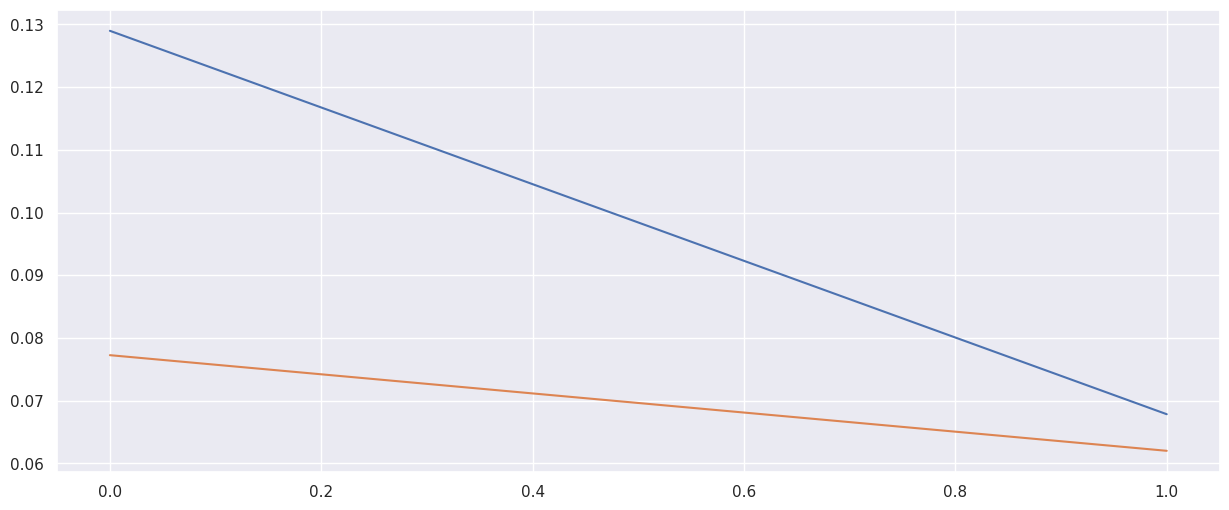

In [72]:
# plot and see the accuracy and loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

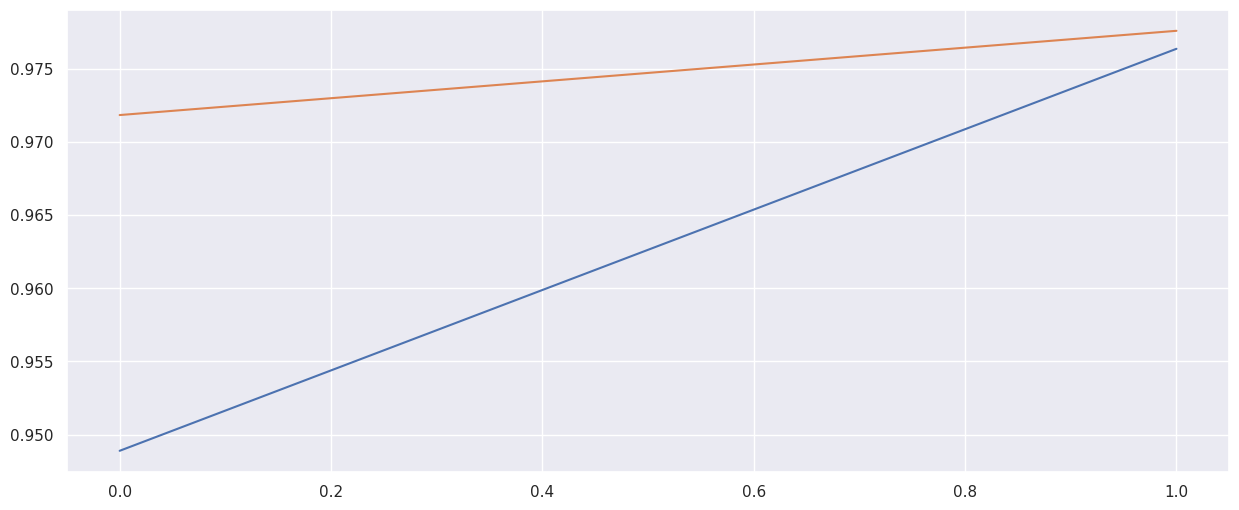

In [73]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

<Axes: >

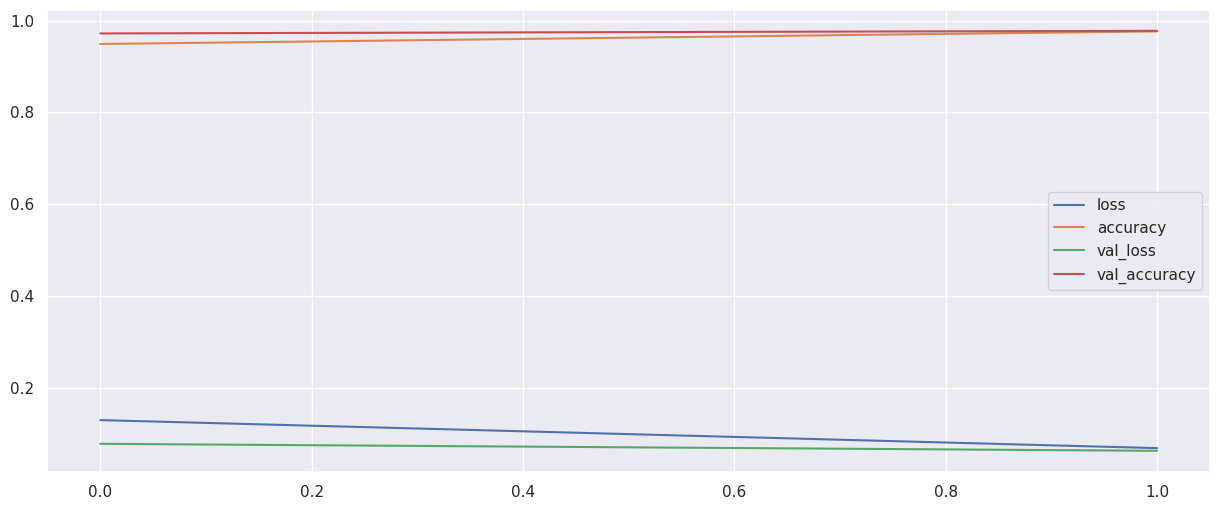

In [74]:
pd.DataFrame(history.history).plot()